In [1]:
import PIL
from datetime import datetime
from PIL import Image
import numpy as np
from sklearn.preprocessing import scale

import FlatPreProcessing

from scipy.misc import imread
import matplotlib.pyplot as plt
from pathlib import Path

BASE_DIR = Path('.')
start = datetime.now()
(train_data, label_data) = FlatPreProcessing.main()

label_data = label_data.ravel()
print("Train Shape:", train_data.shape)

Image Size: 40


Processed: 0 of 7349


Processed: 100 of 7349


Processed: 200 of 7349


Processed: 300 of 7349


Processed: 400 of 7349


Processed: 500 of 7349


Processed: 600 of 7349


Processed: 700 of 7349


Processed: 800 of 7349


Processed: 900 of 7349


Processed: 1000 of 7349


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
print("Fitting Random Forest...")
rf.fit(train_data, label_data)
print("Completed fit.")
finish = datetime.now()
print("Time: {}".format(finish-start))

In [76]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
print("Fitting Adaboost...")
start1 = datetime.now()
# randIndexes = np.random.choice(len(label_data), len(label_data) // 10000)
print("Number of Sample: {}".format(len(randIndexes)))
# td = [train_data[x] for x in randIndexes]
# ld = [label_data[x] for x in randIndexes]
td = train_data
ld = label_data
clf.fit(td, ld)
print("Completed fit.")
finish1 = datetime.now()
print("Time: {}".format(finish1-start1))

Fitting Adaboost...
Number of Sample: 48162


Completed fit.
Time: 0:00:31.465852


In [69]:
randIndexes = np.random.choice(len(label_data), len(label_data) // 100000)
print(len(randIndexes))

4816


In [2]:
# Import the data matrix of the testing data

from LoadTestImages import main

test_data = main()

Processed: 0 of 44


Processed: 0 of 44


In [89]:
print("Predicting Data..")
predictions = clf.predict(train_data[0:10*256**2])
print("finished Predicting!")
predictions = np.asarray(predictions).ravel()

Predicting Data..


finished Predicting!


In [1]:
print(predictions.ravel().shape)
print(predictions)
print(label_data.shape)
print(train_data[0:80**2])

NameError: name 'predictions' is not defined

In [91]:
# K Neighbors
import LoadTestImages
from PIL import ImageFilter
prediction_list = np.asarray(predictions)
s_n = LoadTestImages.SIZE
num_im = 10
print(s_n)
print(prediction_list.shape)
image_list = prediction_list.reshape(num_im, s_n, s_n)
filt_image_list = np.ndarray((num_im, s_n, s_n))
for i in range(num_im):
    im = Image.fromarray(image_list[i])
    im_mode = im.filter(ImageFilter.ModeFilter(9))
    filt_image_list[i] = im_mode
# test_coords = test_data[:, 3:]
# print(test_coords.shape)
# 
# print("KNN Beginning")
# neigh = KNeighborsClassifier(n_neighbors=15)
# neigh.fit(test_coords, predictions.ravel())
# 
# 
# kpredictions = neigh.predict(test_coords)
# 
# print("Pred Shape", predictions.shape)
# 
# predictions = neigh.predict(test_data.ravel())
print("Mode Filtered.")

256
(655360,)


Mode Filtered.


In [32]:
# # K Neighbors
# test_coords = train_data[:, 3:]
# print(test_coords.shape)
# 
# print("KNN Beginning")
# neigh = KNeighborsClassifier(n_neighbors=2)
# neigh.fit(test_coords, predictions.ravel())
# 
# predictions = neigh.predict(test_coords)
# 
# print("Pred Shape", predictions.shape)

In [95]:
# Calculate Dice Similarity Coefficient
# dice_p = filt_image_list.ravel()
dice_p = prediction_list.ravel()
truepos = np.sum(np.multiply(dice_p, label_data[0:10*s_n**2]))
print("True Positives... {}".format(truepos))
falsepos = np.sum(dice_p) - truepos
print("False Positives... {}".format(falsepos))

falseneg = np.sum(label_data[0:10*s_n**2]) - truepos
print("False Negatives... {}".format(falseneg))
precision = truepos / (truepos+falsepos)
print("Precision... {}".format(precision))
recall = truepos / (truepos+falseneg)
print("Recall... {}".format(recall))
dice = 2 * precision * recall / (precision + recall)

print(dice)

True Positives... 188712
False Positives... 88043
False Negatives... 78217
Precision... 0.6818738595508663
Recall... 0.7069745138220276
0.694197364646


In [97]:
import LoadTestImages
pred_image = np.asarray(predictions)
print(pred_image.shape)
t_n = LoadTestImages.SIZE
pred_image = pred_image.reshape(num_im, t_n, t_n)
pred_image.shape

(655360,)


(10, 256, 256)

(655360,)


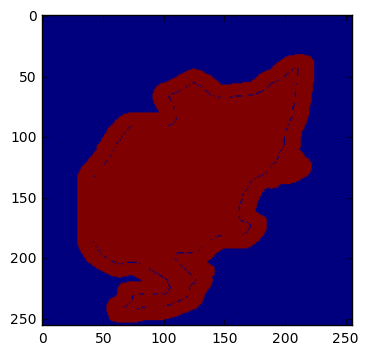

In [102]:
from scipy.misc import imread
import matplotlib.pyplot as plt
lb = np.asarray(label_data[0:10*256**2])
print(lb.shape)
lb = lb.reshape(10, t_n, t_n)
plt.imshow(lb[0])
plt.show()

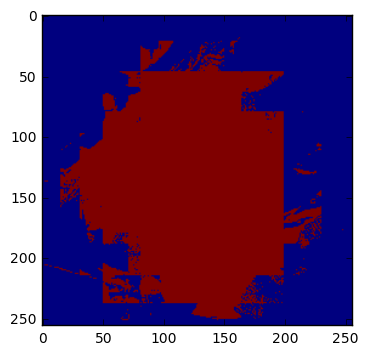

In [104]:
im = pred_image[0]
im = Image.fromarray(im).convert('L')
# im = Image.open('labelled/31.png')
im1 = im.load()
plt.imshow(im)
plt.show()

(500, 328)
0


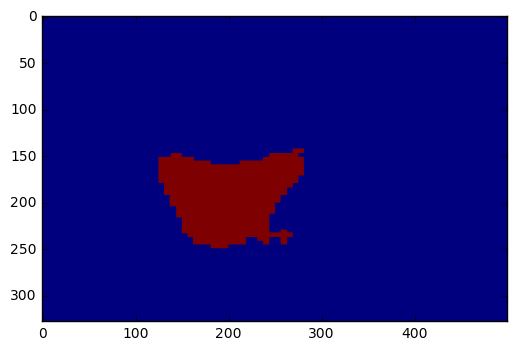

In [79]:
im = Image.open('labelled_1345/10.png')
print(im.size)
im1 = im.load()
print(im1[200,150])
plt.imshow(im)
plt.show()

In [78]:
import os
from pathlib import Path
TRI_DIR = Path('../CatDogDataSet/test_images')
BASE_DIR = Path('.')
base_out = Path(BASE_DIR, 'labelled')
test_dir_out = Path(base_out, 'train')
os.makedirs(str(test_dir_out), exist_ok=True)

test_path = [x for x in TRI_DIR.iterdir() if TRI_DIR.is_dir() and '.jpg' in str(x).lower()]
test_sizes = []
for p in test_path:
    img = Image.open(p)
    test_sizes.append(img.size)
    
# print(test_sizes)
test_names = [os.path.basename(str(x)).split('.')[0] for x in test_path]
test_names = ['0{}'.format(x) if (len(x)==1) else x for x in test_names]
# print(test_names)
count = len(test_names)
for i in range(count):
    (n_x, n_y) = test_sizes[i]
    im = filt_image_list[i]
    im = Image.fromarray(im).convert('L')
    im = im.resize((n_x,n_y), resample=Image.ANTIALIAS)
    basename = '{}.png'.format(test_names[i])
    # print(basename)
    path_out = os.path.join(str(base_out), basename)
    # print("Path out:", str(path_out))
    im.save(path_out)
# test_mat = np.ndarray(count, 32, 32)

print("Saved Files")

Saved Files
